Inicio - Dataset Car Prices

Este dataset contiene ventas de autos de alta gama, los mas caros del mercado con más información de por medio sobre la venta, modelo, color, estado, etc.

sellingprice es la variable objetivo a predecir. Significa: Precio de venta

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
sns.set_style('darkgrid')

# Lectura del dataset

In [105]:
df = pd.read_csv("MaximilianoDominguez_car_prices_top.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Land Rover,LR4,HSE LUX,SUV,automatic,salak2d48da693027,ca,44.0,2059.0,gray,black,land rover north america llc,58500.0,42000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
1,2013,Land Rover,Range Rover Evoque,Pure Plus,SUV,automatic,salvp2bg5dh781072,ca,48.0,25524.0,blue,black,mercedes benz of laguna niguel,35400.0,35500.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
2,2013,Land Rover,Range Rover Evoque,Pure Plus,SUV,automatic,salvp1bg7dh775994,ca,46.0,9214.0,white,black,high bid trading co inc,37400.0,39000.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
3,2013,Land Rover,Range Rover Evoque,Pure Premium,SUV,automatic,salvr2bg6dh755364,ca,5.0,5403.0,gray,black,land rover north america llc,38600.0,30500.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
4,2013,Land Rover,Range Rover Sport,Supercharged Limited Edition,SUV,automatic,salsh2e49da763586,ca,37.0,26757.0,black,gray,jpmorgan chase bank n.a.,61000.0,60000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Descripcion de cada columna y tipo de dato que contiene

- year: Año del modelo del auto (int64) [1982 al 2015]
- make: Marca del auto (object) Ejemplos: ['Aston Martin', 'Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Dodge', 'FIAT','Ferrari','Ford', 'Honda']
- model: Modelo del auto (object) Ejemplos: ['tucson', 'tt', 'thunderbird','taurus', 'tahoe', 'tC', 'sx4', 'swift', 'subrbn','sprinter', 'sportage', 'sonoma']
- trim: Versión del auto (object) Ejemplos: ['Wagon XLT','Wagon Titanium LWB', 'Wagon', 'WS', 'WRX TR', 'WRX STi','WRX STI Limited', 'WRX STI', 'WRX Limited']
- body: Tipo de carrocería (object) Ejemplos: ['wagon', 'van', 'tsx sport wagon', 'transit van', 'suv','supercrew', 'supercab', 'sedan','quad cab', 'q60 coupe']
- transmission: Tipo de transmisión (object) Ejemplos: ['manual', 'automatic']
- vin: Número de identificación del vehículo (object)
- state: Estado (object) Ejemplos: ['ny', 'nv', 'ns', 'nm', 'nj', 'ne', 'nc', 'ms', 'ma', 'la', 'in', 'il', 'hi', 'ga', 'fl','co', 'ca']
- condition: Condición del auto (float64) [1 al 50]
- odometer: Kilometraje del auto (float64)
- color: Color exterior (object) Ejemplos: ['yellow', 'white', 'turquoise', 'silver', 'red', 'lime', 'green', 'gray', 'gold','charcoal','blue', 'black']
- interior: Color interior (object) Ejemplos: ['yellow', 'white', 'tan', 'silver', 'red', 'purple', 'orange','burgundy','black', 'beige']
- seller: Vendedor (object) Ejemplos: ['zygi auto corp', 'zumbrota ford sales llc', 'zuma autoboat','101motors', '1 for all auto sales', '1 cochran of monroeville']
- mmr: Precio promedio de mercado (float64) Ejemplo: 21500.0
- sellingprice: Precio de venta (float64) Ejemplo: 21500.0
- saledate: Fecha de venta (object) Ejemplo: [Wed May 27 2015 17:00:00 GMT-0700 (PDT)]

# Estadística descriptiva

In [106]:
df.shape

(2843, 16)

El dataset elegido cuenta con 533870 filas y 16 columnas, de las cuales 10 (diez) son variables independientes a analizar y el target es sellingprice

In [107]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2843 non-null   int64  
 1   make          2843 non-null   object 
 2   model         2843 non-null   object 
 3   trim          2843 non-null   object 
 4   body          2843 non-null   object 
 5   transmission  2843 non-null   object 
 6   vin           2843 non-null   object 
 7   state         2843 non-null   object 
 8   condition     2843 non-null   float64
 9   odometer      2843 non-null   float64
 10  color         2842 non-null   object 
 11  interior      2842 non-null   object 
 12  seller        2843 non-null   object 
 13  mmr           2843 non-null   float64
 14  sellingprice  2843 non-null   float64
 15  saledate      2843 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory usage: 355.5+ KB


## Columnas categóricas

In [108]:
df.describe(include = 'object').T

,count,unique,top,freq
make,2843,10,Land Rover,1323
model,2843,41,Range Rover Sport,516
trim,2843,69,Base,679
body,2843,10,SUV,1409
transmission,2843,2,automatic,2622
vin,2843,2793,wp0ca2988xu629622,4
state,2843,31,ca,888
color,2842,18,black,970
interior,2842,16,black,1420
seller,2843,946,porsche financial services,197


Aqui notamos que en la columna vin: (Número de identificación del vehículo) encontramos valores automatic que debemos limpiar antes de trabajar el dataframe

## Columnas numéricas

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2843.0,2009.694689,3.558152,1997.0,2008.0,2011.0,2012.0,2015.0
condition,2843.0,34.714386,12.906556,1.0,29.0,38.0,44.0,49.0
odometer,2843.0,52739.416110,37335.387098,1.0,23297.0,44636.0,75343.5,218184.0
mmr,2843.0,39932.052409,27267.411740,450.0,19350.0,36600.0,52700.0,182000.0
sellingprice,2843.0,39547.425607,27010.463598,200.0,19225.0,36000.0,52500.0,183000.0


<Figure size 1500x1000 with 0 Axes>

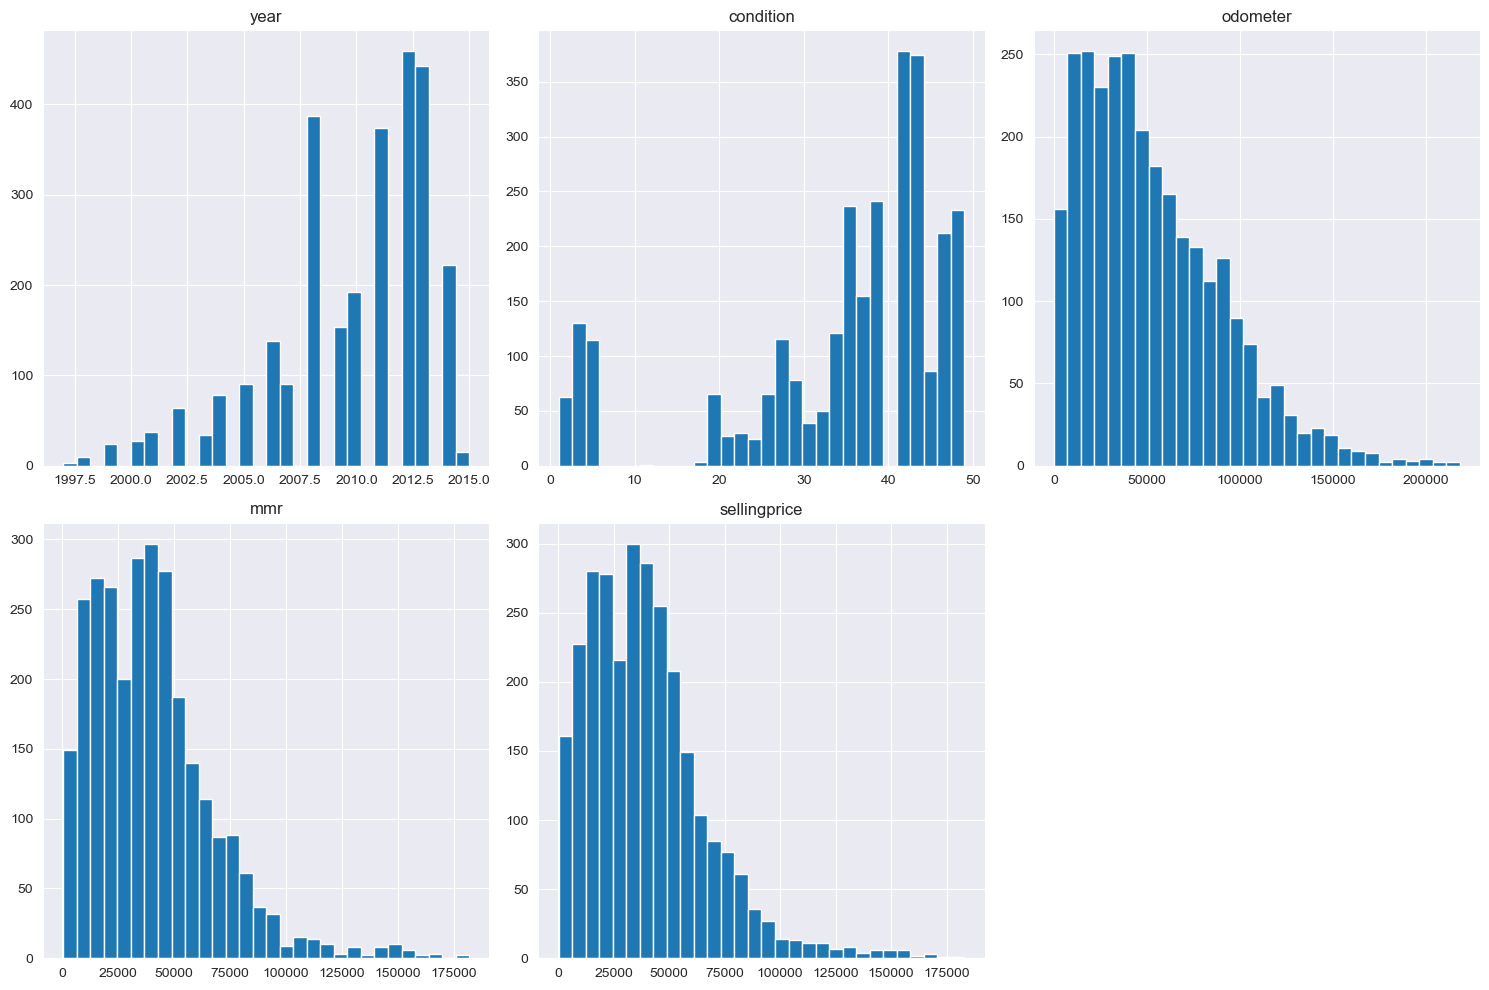

In [110]:
plt.figure(figsize=(15, 10))

# Distribuciones de las variables numéricas
df[['year', 'condition', 'odometer', 'mmr', 'sellingprice']].hist(bins=30, figsize=(15, 10), layout=(2, 3))

# Mostrar graficos
plt.tight_layout()
plt.show()

Analisis de lo visto en los plots:

1) year: La mayoría de los autos en el conjunto de datos son de años recientes.
2) condition: La condición de los autos varía, con algunos autos en excelente estado (condición alta) y otros en condiciones más bajas.
3) odometer: El kilometraje muestra una distribución sesgada a la derecha, indicando que hay más autos con bajos kilometrajes.
4) mmr: El precio promedio de mercado también está sesgado a la derecha, con la mayoría de los autos teniendo un MMR bajo.
5) sellingprice: La distribución del precio de venta es similar a la del MMR, con la mayoría de los autos vendiéndose a precios más bajos.

In [111]:
order_sellingprice = df.sort_values(by='sellingprice', ascending=False)
df_top_sellingprice = order_sellingprice[['make', 'sellingprice']]#.head(320)

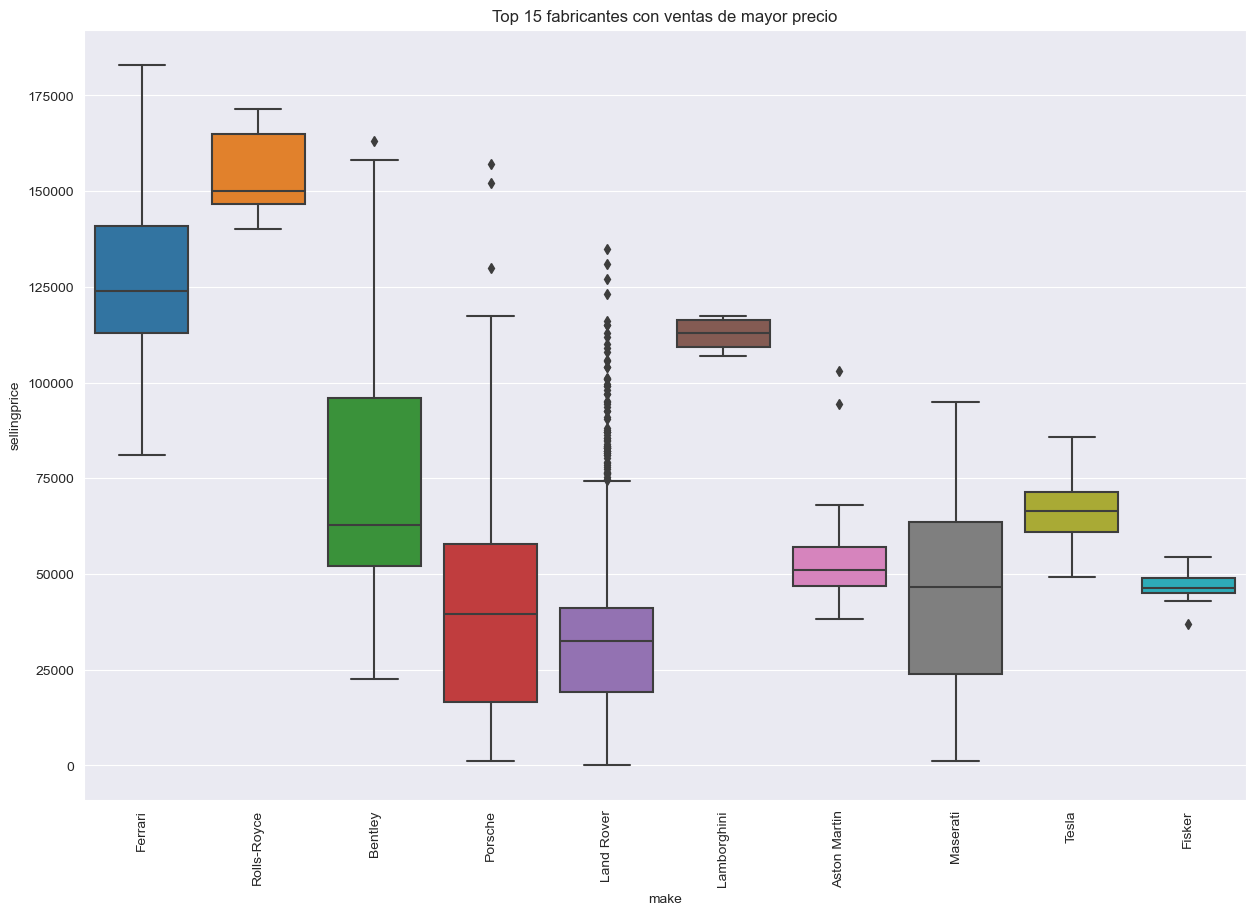

In [112]:
# Boxplot del top 15 precio de venta por marca
plt.figure(figsize=(15, 10))
sns.boxplot(x='make', y='sellingprice', data=df_top_sellingprice)
plt.xticks(rotation=90)
plt.title('Top 15 fabricantes con ventas de mayor precio')
plt.show()

In [113]:
# Filtrando los 15 modelos mas vendidos
top_models = df['model'].value_counts().nlargest(10).index
top_model_data = df[df['model'].isin(top_models)]

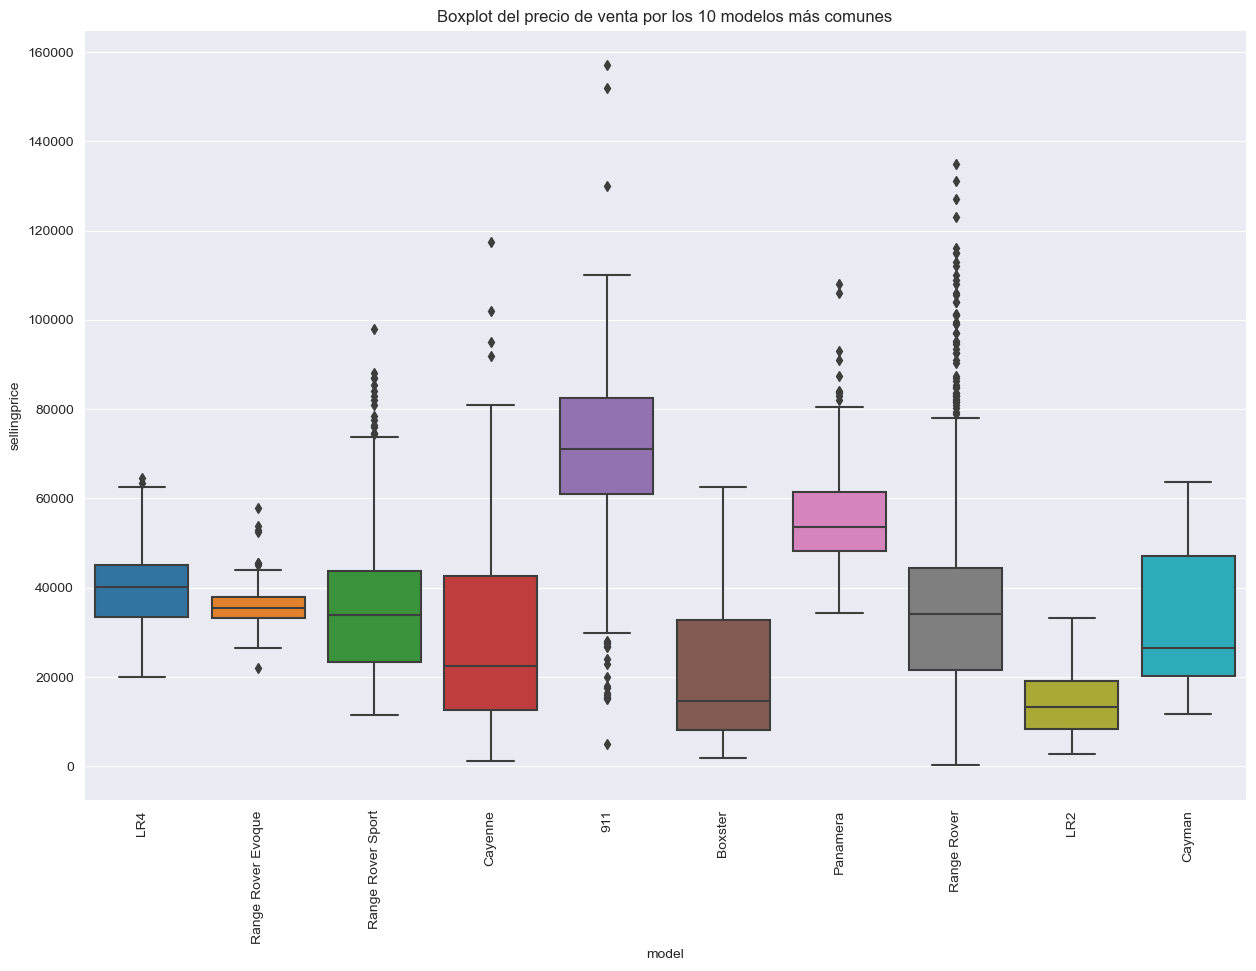

In [114]:
# Boxplot del precio de venta por modelo (mostrando solo los 10 modelos más comunes)
plt.figure(figsize=(15, 10))
sns.boxplot(x='model', y='sellingprice', data=top_model_data)
plt.xticks(rotation=90)
plt.title('Boxplot del precio de venta por los 10 modelos más comunes')
plt.show()

In [115]:
frec = df['make'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df

,count
make,
Land Rover,1323
Porsche,1204
Maserati,122
Bentley,102
Aston Martin,25
Tesla,23
Ferrari,17
Rolls-Royce,15
Fisker,8


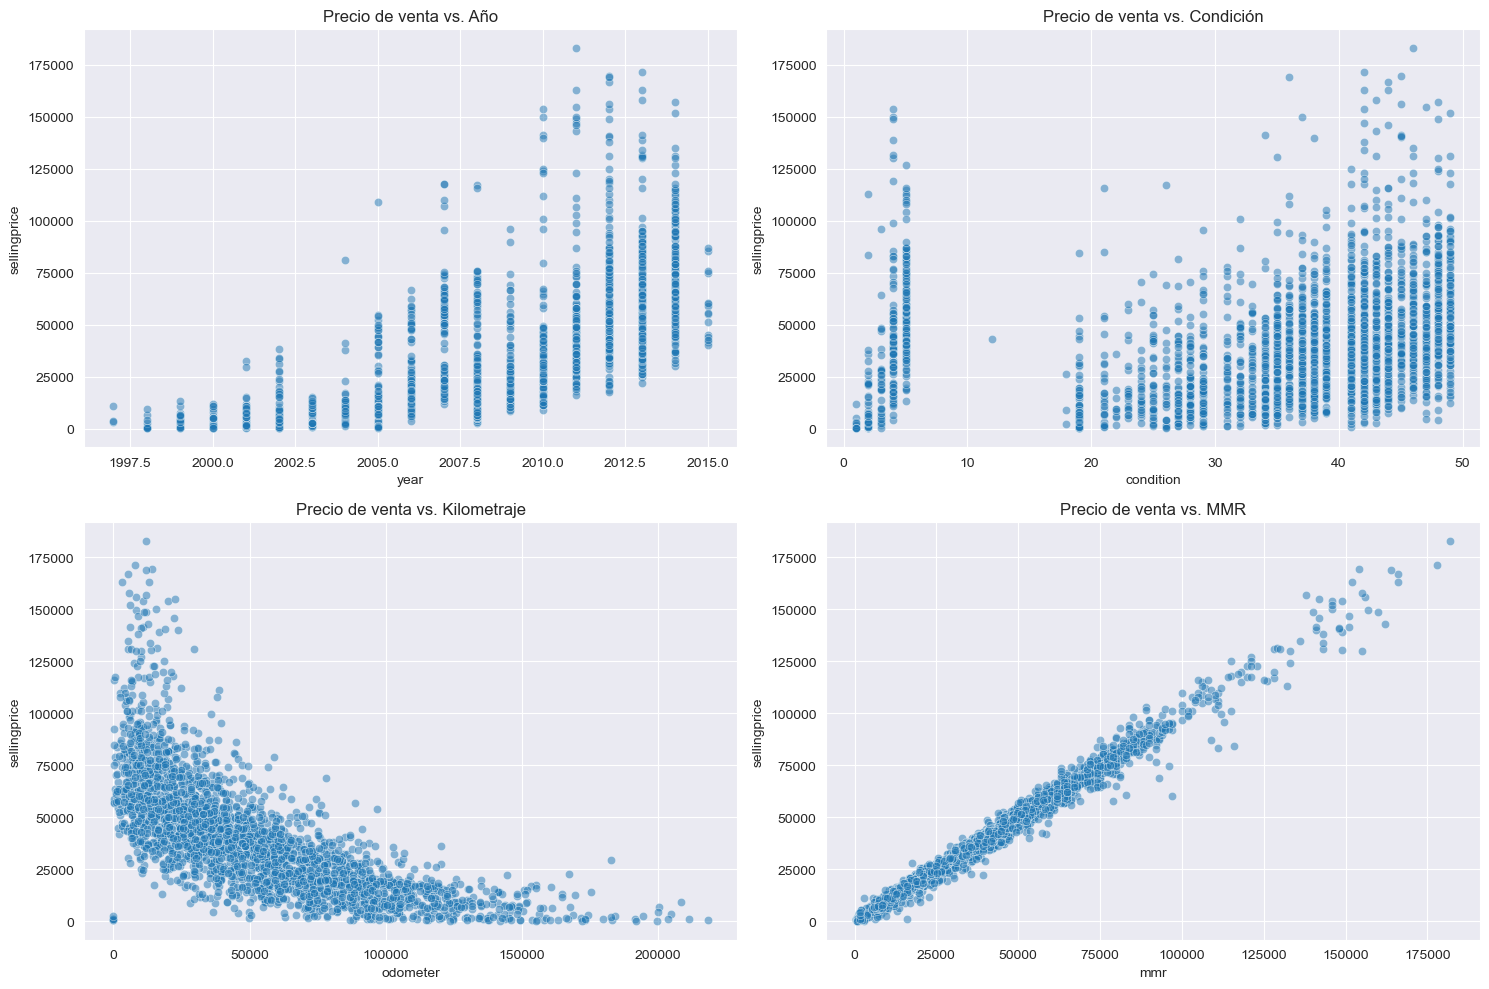

In [116]:
# Scatter plots para visualizar la relación entre el precio de venta y otras variables numéricas
plt.figure(figsize=(15, 10))

# Relación entre el precio de venta y el año
plt.subplot(2, 2, 1)
sns.scatterplot(x='year', y='sellingprice', data=df, alpha=0.5)
plt.title('Precio de venta vs. Año')

# Relación entre el precio de venta y la condición
plt.subplot(2, 2, 2)
sns.scatterplot(x='condition', y='sellingprice', data=df, alpha=0.5)
plt.title('Precio de venta vs. Condición')

# Relación entre el precio de venta y el kilometraje
plt.subplot(2, 2, 3)
sns.scatterplot(x='odometer', y='sellingprice', data=df, alpha=0.5)
plt.title('Precio de venta vs. Kilometraje')

# Relación entre el precio de venta y el MMR
plt.subplot(2, 2, 4)
sns.scatterplot(x='mmr', y='sellingprice', data=df, alpha=0.5)
plt.title('Precio de venta vs. MMR')

plt.tight_layout()
plt.show()

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

features = ['year', 'condition', 'odometer', 'mmr', 'make', 'model', 'trim', 'body', 'transmission']
target = 'sellingprice'

X = df[features]
y = df[target]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

var_categoricas = ['make', 'model', 'trim', 'body', 'transmission']
var_numericas = ['year', 'condition', 'odometer', 'mmr']

# Transformar datos para modelar
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, var_numericas),
        ('cat', categorical_transformer, var_categoricas)
    ])

# Iniciar los modelos
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=10, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=10, random_state=42),
    "Support Vector Regressor": SVR()
}

# Evaluar los modelos y almacenar los resultados
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "MSE": mse,
        "R2": r2
    })

results_df = pd.DataFrame(results)


In [124]:
# Identificar el mejor modelo basado en R2 Score
best_model_name = results_df.loc[results_df['R2'].idxmax(), 'Model']
best_model = models[best_model_name]

# Crear la función de predicción
def predecir_precio(year, condition, odometer, mmr, make, model, trim, body, transmission):
    # Crear un DataFrame con una sola fila con los datos ingresados
    input_data = pd.DataFrame({
        'year': [year],
        'condition': [condition],
        'odometer': [odometer],
        'mmr': [mmr],
        'make': [make],
        'model': [model],
        'trim': [trim],
        'body': [body],
        'transmission': [transmission]
    })

    # Preprocesar y predecir el precio usando el modelo entrenado
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', best_model)])
    predicted_price = pipeline.predict(input_data)
    return predicted_price[0]

# Ejemplo de uso de la función de predicción
predicted_price = predecir_precio(2024, 45, 0, 80000, 'Porsche', '911', 'Carrera S', 'Convertible', 'automatic')
print(f"El precio predicho para el auto es: ${predicted_price:.2f}")


El precio predicho para el auto es: $78597.65
